In [1]:
using Revise
import Random: seed!
using MAPPFD

┌ Info: Precompiling MAPPFD [637336f9-a353-47d6-b9eb-a07751d9740b]
└ @ Base loading.jl:1423


# Step-1: Generate an Instance

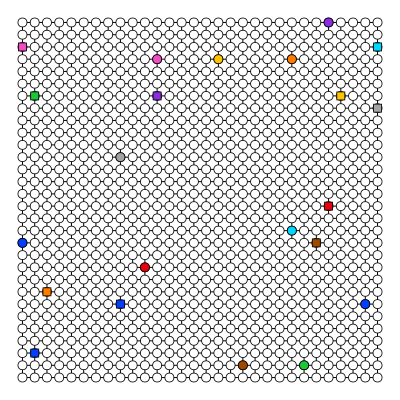

In [2]:
seed!(1)
ins = generate_random_sync_instance_grid_wellformed(
  N_min = 10,
  N_max = 30,
  width = 30,
  height = 30,
  occupancy_rate = 0,
  max_num_crashes = 1,
)
plot_instance(ins; markersize = 5, markersize_goal = 4)

# Step-2: Solve

elapased: 1.21 sec	initial paths are found
elapased: 1.415 sec	initial unresolved events: 22
elapased: 1.415 sec	start resolving events with DFS-style
elapased: 2.008 sec	resolved: 0029	unresolved: 0001
elapased: 2.009 sec	found solution
  2.728715 seconds (6.87 M allocations: 381.105 MiB, 3.50% gc time, 95.89% compilation time)
verification:true


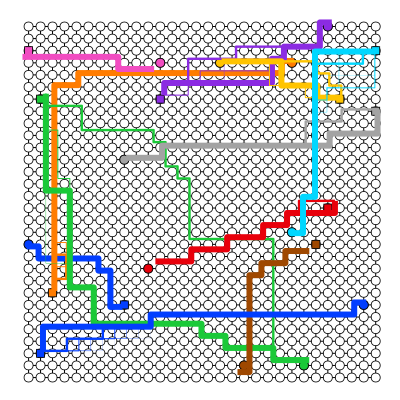

In [3]:
# solve
@time solution = MAPPFD.planner1(
    ins;
    multi_agent_path_planner = MAPPFD.Solver.RPP,
    VERBOSE = 2,
    time_limit_sec = 10,
)

# verification
seed!(1)
println("verification:", approx_verify_with_local_FD(ins, solution; max_activation = 80, num_repetition = 10, failure_prob = 0.1))
plot_solution(ins, solution; markersize = 5, markersize_goal = 4)

# Step-3: Emulate Execution

 33.261893 seconds (174.46 M allocations: 6.416 GiB, 4.05% gc time, 2.81% compilation time)


┌ Info: finish execution at 44-th activation's
└ @ MAPPFD /Users/Kei18/Dropbox/work/project/risk-aware/simulator/src/exec.jl:86
┌ Info: Saved animation to 
│   fn = /Users/Kei18/Dropbox/work/project/risk-aware/simulator/notebooks/tmp.gif
└ @ Plots /Users/Kei18/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/risk-aware/simulator/notebooks/tmp.gif")
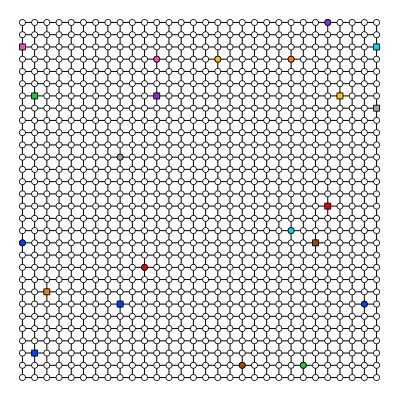

In [4]:
seed!(1)
hist = execute_with_local_FD(ins, solution; max_activation = 80, VERBOSE = 2, scheduled_crashes = [SyncCrash(who=1, loc=304, when=5)])

# requiring ~30s
@time plot_anim(ins, hist; markersize = 4, markersize_goal = 3)